# Week 1 - Preprocessing

## Please run the cells of the notebook as you get to them while reading

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 1. Lesson on how to search for Python commands

Let's consider a few possible ways to learn about Python programming.  Let's suppose you want to learn how to produce a short summary of the information in your DataFrame.

1. Your **instructor** could provide the information.

You could be provided with a lesson about functions like info() and describe().  If you have a pandas DataFrame called df, then you can summarize its contents using df.info() or df.describe().  df.info() provides a list of column names with their counts and data types.  df.describe() will provide information such as the mean, min, max, standard deviation, and quantiles.  Thus:

In [2]:
df = pd.DataFrame([[1, 4], [2, 5], [3, 6], [4, 7]], columns = ['A', 'B'])
df.describe()

,A,B
count,4.000000,4.000000
mean,2.500000,5.500000
std,1.290994,1.290994
min,1.000000,4.000000
25%,1.750000,4.750000
50%,2.500000,5.500000
75%,3.250000,6.250000
max,4.000000,7.000000


In this describe() result, we see that the two columns A and B each have four elements.  The means and other statistics are shown.

2. You could look up the information on **Google**.

If I Google the question "how do I briefly summarize the contents of a dataframe using Python," I receive the following link (among others), which discusses the describe() command mentioned above:

https://www.w3schools.com/python/pandas/ref_df_describe.asp

It also provide the complete usage information:

dataframe.describe(percentiles, include, exclude, datetime_is_numeric)

It explains that "percentiles" is set by default to [0.25, 0.5, 0.75] but we could change that.  Let's try it!  Since there are three intervals here rather than four, it might be more meaningful to ask about a 33rd and 67th percentile rather than 25, 50, and 75.  We can use 1/3 for 0.33 and 2/3 for 0.67 to get the exact percentile values.

In [3]:
df = pd.DataFrame([[1, 4], [2, 5], [3, 6], [4, 7]], columns = ['A', 'B'])
df.describe(percentiles = [1/3, 2/3])

,A,B
count,4.000000,4.000000
mean,2.500000,5.500000
std,1.290994,1.290994
min,1.000000,4.000000
33.3%,2.000000,5.000000
50%,2.500000,5.500000
66.7%,3.000000,6.000000
max,4.000000,7.000000


Apparently, the 50% value (the median) stays even though we did not specifically request it.

3. You could look up the official **documentation**.

Now that we know we want the pandas describe() function, try Googling: pandas documentation describe.

Here is the general documentation page for pandas:

https://pandas.pydata.org/docs/index.html

Here is the specific page for the describe() function:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

When I look at this, it appears to be showing the most recent (currently 2.2) version of pandas; this is shown in the upper right corner.

4. You could also ask **ChatGPT**.

Let's try it.  ChatGPT, "how do I briefly summarize the contents of a dataframe using Python"

When I do this, ChatGPT mentions describe() among other options, but does not go into detail.  However, I could ask it.  ChatGPT, "tell me more about describe() in Python for summarizing dataframes."

Then, I get a good explanation of describe(), although it does not mention the percentiles option.  One advantage of using Google or the documentation in addition of ChatGPT is that these sources may provide interesting information that does not directly answer our question.  Thus, we might not have known about the various arguments, such as percentiles, if we only used ChatGPT.  A second issue is that ChatGPT sometimes hallucinates (it makes up information).  In general, by examining multiple sources - Google, documentation, and ChatGPT - we can get more information.

# 2. Weekly graph question

In Storytelling With Data, on page 1: examine the pie chart graph in the upper left corner of the graphs.  Please write a short explanation of the pros and cons of this graph.  What do you think of the choice of pie chart as a format?  The color scheme?  The legend?  The title?  How would you draw it differently if you were creating this graph?

Please write a short explanation of the pros and cons of this graph:
- The pie chart offers some clear advantages, such as its ability to present basic data in a straightforward, visually digestible format. It allows the audience to quickly understand proportions relative to the whole, making it easy to compare categories. However, pie charts have notable limitations. They become less effective when the dataset has too many categories or when the differences between values are minimal, as small changes in data are hard to distinguish. Additionally, pie charts don’t show trends over time or relationships between variables, which can limit their use for more complex analyses. According to Infogram, pie charts can also lead to accuracy issues: "Comparing slice sizes, especially with many slices or small differences, can be difficult. Our brains struggle with angles compared to lengths (like in bar charts)."

What do you think of the choice of pie chart as a format? 
- The choice of a pie chart can be appropriate, but it depends on the context of the data. If the data has only a few categories and the goal is to provide a quick, high-level snapshot, a pie chart is a good option. For example, in a board meeting where the objective is to illustrate the distribution of employees—such as full-time, part-time, and contract workers—on a specific date, a pie chart would work well. However, if the goal is to track workforce changes over the past few years or months, a pie chart would not be the best choice, as it doesn't effectively represent trends or variations over time.


The color scheme?  The legend?  The title?  How would you draw it differently if you were creating this graph?
- Regarding the color scheme, I find it challenging to read due to the contrast and lack of complementary tones. A more harmonious color palette would improve both accessibility and visual appeal. The title, "Survey Results," is too vague and doesn't provide the necessary context for the audience. It should reflect the specific focus of the survey, such as “Mood Survey Results” or even the question that was asked to give clarity and relevance. If I were redesigning the chart, I would adjust the color scheme to use more complementary colors, increase the contrast for better readability, and modify the title to make it more informative and descriptive.


# 3. Homework - Bank Customers


I will begin by creating a file for you to analyze.  I will show you all of the steps I used to create it.  Please run this code in order to create and save a file about bank customers.

### The numbered problems are for you to solve.

In [4]:
num_customers = 100
np.random.seed(0)

In [5]:
df_bank = pd.DataFrame(columns = ["CustomerID"])

In [6]:
df_bank["CustomerID"] = [str(x) for x in np.arange(num_customers)]

In [7]:
start = datetime(1950, 1, 1)
end = datetime(2024, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = num_customers)
df_bank["BirthDate"] = start + pd.to_timedelta(random_days, unit='D')
df_bank["BirthDate"] = df_bank["BirthDate"].dt.strftime('%Y-%m-%d')

In [8]:
def make_ssn_string(num):
    ssn_str = f'{num:09}'
    return ssn_str[0:3] + "-" + ssn_str[3:5] + "-" + ssn_str[5:9]
ssn_vector_func = np.vectorize(make_ssn_string)
df_bank["SSN"] = ssn_vector_func(np.random.randint(0, 999999999, size = num_customers))

In [9]:
df_bank["AccountID"] = np.random.randint(0, num_customers, size = num_customers)

In [10]:
random_days = np.random.randint(0, 365 * 80, size = num_customers)
df_bank["AccountOpened"] = (pd.to_datetime(df_bank["BirthDate"]) + pd.to_timedelta(random_days, unit='D')).dt.strftime('%Y-%m-%d')

In [11]:
df_bank.loc[0, "BirthDate"] = "1980"
df_bank.loc[1, "BirthDate"] = "no date"

In [12]:
df_bank.loc[2, "AccountID"] = np.nan

In [13]:
df_bank["AccountType"] = np.random.choice(["checking", "savings", "cd"], size = num_customers)

Load the bank_customers.csv file.  (There is no practical reason to save it, then load it - we're just demonstrating how this would be done.)
I am calling the loaded df by a new name, df_bank_loaded, to make clear why it's not the same variable as the old df.  Of course, in actuality the two contain the exact same data!  But it's good to get in the habit of naming things carefully.

In [14]:
df_bank.loc[num_customers - 1] = df.loc[0]
df_bank.to_csv("bank_customers.csv", index=False)

In [15]:
df_bank_loaded = pd.read_csv("bank_customers.csv")

1. Use describe() and info() to analyze the data.   Also, look at the first few rows.

Suggested Google Search or ChatGPT prompt: "how do I use the describe function in python"

Example Google result: https://www.w3schools.com/python/pandas/ref_df_describe.asp

In [16]:
#summary of data within df
df_bank_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     99 non-null     float64
 1   BirthDate      99 non-null     object 
 2   SSN            99 non-null     object 
 3   AccountID      98 non-null     float64
 4   AccountOpened  99 non-null     object 
 5   AccountType    99 non-null     object 
dtypes: float64(2), object(4)
memory usage: 3.2+ KB


In [17]:
#loaded general information in df
df_bank_loaded.describe(include='all')

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
count,99.000000,99,99,98.000000,99,99
unique,NaN,99,99,NaN,99,3
top,NaN,1980,530-47-1866,NaN,1959-12-06,savings
freq,NaN,1,1,NaN,1,35
mean,49.000000,NaN,NaN,46.551020,NaN,NaN
std,28.722813,NaN,NaN,27.679358,NaN,NaN
min,0.000000,NaN,NaN,0.000000,NaN,NaN
25%,24.500000,NaN,NaN,25.500000,NaN,NaN
50%,49.000000,NaN,NaN,42.000000,NaN,NaN
75%,73.500000,NaN,NaN,71.000000,NaN,NaN


In [18]:
#loaded few few rows of df
df_bank_loaded.head()

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd


In [19]:
# The first few rows
df_bank_loaded.iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
2,2.0,1976-12-15,377-98-9839,NaN,2019-03-25,checking
3,3.0,2003-10-18,474-05-7613,86.0,2004-03-02,cd
4,4.0,1985-12-06,750-55-5509,77.0,2059-05-05,cd


If you used describe() and info(), you now know that BirthDate and AccountOpened are strings.  But we want them to be dates.  Let's convert them to dates (or Timestamps in pandas).  When we try this, we get a ValueError.

In [20]:
try:
    df_bank_loaded["BirthDate"] = pd.to_datetime(df_bank_loaded["BirthDate"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for BirthDate: {e}")

ValueError for BirthDate: time data "1980" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


In [21]:
try:
    df_bank_loaded["AccountOpened"] = pd.to_datetime(df_bank_loaded["AccountOpened"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError for AccountOpened: {e}")

It worked!


The simple way to fix this is to remove the rows that have bad dates for BirthDate.  I Googled:

"How to remove rows from a dataframe that have poorly formatted dates using python"

https://stackoverflow.com/questions/21556744/pandas-remove-rows-whose-date-does-not-follow-specified-format

This recommends that I verify that the date is a string of length 10, because YYYY-MM-DD has that length:

df1\[df1.BirthDate.str.len() !=10]

In [22]:
len(df_bank_loaded[df_bank_loaded.BirthDate.str.len() == 10])

97

In [23]:
df_bank_loaded[df_bank_loaded.BirthDate.str.len() != 10].iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
99,NaN,NaN,NaN,NaN,NaT,NaN


Now we can make this permanent, creating a new DataFrame df_bank_datefix.
I am making a copy in order to ensure that df_bank_datefix is a new DataFrame rather than being a slice of the old one.

In [24]:
df_bank_datefix = df_bank_loaded[df_bank_loaded.BirthDate.str.len() == 10].copy()

Test again:

In [25]:
try:
    df_bank_datefix["BirthDate"] = pd.to_datetime(df_bank_datefix["BirthDate"], format='%Y-%m-%d')
    print("It worked!")
except ValueError as e:
    print(f"ValueError: {e}")

It worked!


2. To check that it worked, use a summary function that will tell you if the BirthDate field is now a datetime type

In [26]:
df_bank_loaded[df_bank_loaded.BirthDate.str.len() != 10].iloc[0:5]

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
0,0.0,1980,530-47-1866,4.0,1959-12-06,checking
1,1.0,no date,682-76-9175,67.0,2039-02-20,cd
99,NaN,NaN,NaN,NaN,NaT,NaN


In [27]:
df_bank_loaded.describe(include='all')

,CustomerID,BirthDate,SSN,AccountID,AccountOpened,AccountType
count,99.000000,99,99,98.000000,99,99
unique,NaN,99,99,NaN,NaN,3
top,NaN,1980,530-47-1866,NaN,NaN,savings
freq,NaN,1,1,NaN,NaN,35
mean,49.000000,NaN,NaN,46.551020,2033-03-27 14:18:10.909090816,NaN
min,0.000000,NaN,NaN,0.000000,1953-05-05 00:00:00,NaN
25%,24.500000,NaN,NaN,25.500000,2011-04-11 00:00:00,NaN
50%,49.000000,NaN,NaN,42.000000,2032-09-02 00:00:00,NaN
75%,73.500000,NaN,NaN,71.000000,2061-03-15 12:00:00,NaN
max,98.000000,NaN,NaN,97.000000,2095-12-10 00:00:00,NaN


In [28]:
df_bank_loaded.dtypes

CustomerID              float64
BirthDate                object
SSN                      object
AccountID               float64
AccountOpened    datetime64[ns]
AccountType              object
dtype: object

3. Check whether there are any null values in the DataFrame.  If so, remove those rows or (if you prefer) fill in the value with an appropriate number.

First try at a Google search or ChatGPT prompt: "how do I find out if there are any null values in a pandas DataFrame?"

This page gives an answer.  Unfortunately, it took my request too literally: it tells me only if there are any, and not which rows have them.  On reflection, that's not really what I want - I think I asked the wrong question.  I want to see the rows, not just _whether_ there are any.

https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

ChatGPT likewise doesn't give the answer I want - because I asked the wrong question.

Next try at a Google search or ChatGPT prompt: "how do I check which rows have null values in a pandas DataFrame?"

This page gives an answer:

https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe

ChatGPT also gives a good answer.  I recommend looking at both of them!

Now try it on your own:

Suggested Google search or ChatGPT prompt: "how do I remove rows with null values in a pandas DataFrame?"

Suggested Google search or ChatGPT prompt: "how do I fill in null values in a pandas DataFrame?"

<b>Answer to: First try at a Google search or ChatGPT prompt: "how do I find out if there are any null values in a pandas DataFrame?" </b>

Google search provided the following AI overview:

Here's how to check for null values in a Pandas DataFrame: [1, 2]  

1. Use isnull(): 
	• The isnull() method returns a DataFrame of boolean values, where True indicates a null value and False indicates a non-null value. 

    import pandas as pd
    
    data = {'col1': [1, 2, None, 4], 'col2': [5, None, 7, 8]}
    df = pd.DataFrame(data)
    
    null_values = df.isnull()
    print(null_values)

1. Check for any null values: 
	• To check if there are any null values in the entire DataFrame, use any() method. 

    has_null = df.isnull().any().any()
    print(has_null)

1. Count null values: 
	• To count the number of null values in each column, use sum() method. [2]  

    null_counts = df.isnull().sum()
    print(null_counts)

1. Total number of null values: 
	• To get the total number of null values in the entire DataFrame. 

    total_null_count = df.isnull().sum().sum()
    print(total_null_count)

This output aligned resulted in the findings identified in the original answer  -- "it tells me only if there are any, and not which rows have them."

In [29]:
nulls_in_df = df_bank_loaded.isnull().any()
print(nulls_in_df)

CustomerID       True
BirthDate        True
SSN              True
AccountID        True
AccountOpened    True
AccountType      True
dtype: bool


In [30]:
not_null = df_bank_loaded.notnull().any()
print(not_null)

CustomerID       True
BirthDate        True
SSN              True
AccountID        True
AccountOpened    True
AccountType      True
dtype: bool


<b> Answer to: Next try at a Google search or ChatGPT prompt: "how do I check which rows have null values in a pandas DataFrame?"</b>

Google provided an AI overview of the following: 

Here's how to check which rows have null values in a Pandas DataFrame: 

1. Use isnull() to create a boolean mask: 

The isnull() method identifies null values (NaN) and returns a DataFrame of the same shape, with True where values are null and False otherwise. 

    data = {'col1': [1, 2, np.nan, 4], 'col2': [5, np.nan, 7, 8], 'col3': [np.nan, 10, 11, 12]}
    df = pd.DataFrame(data)
    null_mask = df.isnull()
    print(null_mask)

2. Use any(axis=1) to find rows with any null values: 

Apply the any() method along the rows (axis=1) of the boolean mask. This returns a boolean Series indicating whether each row contains at least one null value. 

    rows_with_null = null_mask.any(axis=1)
    print(rows_with_null)

3. Select rows with null values: 

Use boolean indexing with the rows_with_null Series to select the rows that contain null values. 

       df_with_nulls = df[rows_with_null]
       print(df_with_nulls)

4. Alternative way to select rows with null values: 

You can combine the isnull() and any() methods directly within the boolean indexing for a more concise approach. 

    df_with_nulls_alt = df[df.isnull().any(axis=1)]
    print(df_with_nulls_alt)

I used the example from #1/#2 above and updated the code to reflect the data set we are using. The code output is below. 

In [31]:
df = pd.DataFrame(df_bank_loaded)

#create null mask
null_mask = df.isnull()

#identify rows with any null values
rows_with_null = null_mask.any(axis=1)

print(rows_with_null)

0     False
1     False
2      True
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99     True
Length: 100, dtype: bool


<b> Answer to: Suggested Google search or ChatGPT prompt: "how do I remove rows with null values in a pandas DataFrame?"</b> 

Stackoverflow: https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame

Google AI overview: 
Here is how to remove rows with null values in a Pandas DataFrame: 

• Using dropna(): 

The dropna() method removes rows containing null values (NaN). 
By default, it removes any row with at least one null value. 
	
    • To remove rows with any null value: 

    df = pd.DataFrame({'A': [1, 2, None, 4], 'B': [5, None, 7, 8]})
    df_cleaned = df.dropna()
    print(df_cleaned)

• To remove rows where all values are null: 

    df_cleaned_all = df.dropna(how='all')
    print(df_cleaned_all)

• To remove rows with null values in specific columns: 

     df_cleaned_subset = df.dropna(subset=['A'])
     print(df_cleaned_subset)

• Inplace modification: By default, dropna() returns a new DataFrame. To modify the original DataFrame, use inplace=True: 

    df.dropna(inplace=True)

The first result from Google AI created a dictionary with keys, which we reviewed last semester, but I don't think that is the most straight forward approach. Due to this, I used the second one, which is more similar to what the professor mentioned in class. The code output is below.

In [32]:
df_cleaned = df_bank_loaded.dropna()
print(df_cleaned)

    CustomerID   BirthDate          SSN  AccountID AccountOpened AccountType
0          0.0        1980  530-47-1866        4.0    1959-12-06    checking
1          1.0     no date  682-76-9175       67.0    2039-02-20          cd
3          3.0  2003-10-18  474-05-7613       86.0    2004-03-02          cd
4          4.0  1985-12-06  750-55-5509       77.0    2059-05-05          cd
5          5.0  2008-02-29  671-43-0485       75.0    2025-05-03    checking
..         ...         ...          ...        ...           ...         ...
94        94.0  1969-03-14  958-12-8308        5.0    2037-04-03     savings
95        95.0  1975-09-23  607-97-1651       36.0    2011-07-24    checking
96        96.0  1989-03-09  870-80-0364        0.0    2054-11-01          cd
97        97.0  1960-09-23  773-33-2797       75.0    1993-09-16          cd
98        98.0  1975-08-17  846-64-7054       34.0    2032-12-25     savings

[98 rows x 6 columns]


<b> Answer to: Suggested Google search or ChatGPT prompt: "how do I fill in null values in a pandas DataFrame?"</b> 

A Google search resulted in the following websites, which were helpful:

1. https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/

2. https://stackoverflow.com/questions/65470708/best-way-to-fill-null-values-with-conditions-using-pandas

3. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

All three websites referenced using fillna. I used this approach with our data, replaced null values with 0 (since 0 is most similar to null) and the code output is below.

In [33]:
df_filled_0 = df_bank_loaded.fillna(0)
print(df_filled_0)

    CustomerID   BirthDate          SSN  AccountID        AccountOpened  \
0          0.0        1980  530-47-1866        4.0  1959-12-06 00:00:00   
1          1.0     no date  682-76-9175       67.0  2039-02-20 00:00:00   
2          2.0  1976-12-15  377-98-9839        0.0  2019-03-25 00:00:00   
3          3.0  2003-10-18  474-05-7613       86.0  2004-03-02 00:00:00   
4          4.0  1985-12-06  750-55-5509       77.0  2059-05-05 00:00:00   
..         ...         ...          ...        ...                  ...   
95        95.0  1975-09-23  607-97-1651       36.0  2011-07-24 00:00:00   
96        96.0  1989-03-09  870-80-0364        0.0  2054-11-01 00:00:00   
97        97.0  1960-09-23  773-33-2797       75.0  1993-09-16 00:00:00   
98        98.0  1975-08-17  846-64-7054       34.0  2032-12-25 00:00:00   
99         0.0           0            0        0.0                    0   

   AccountType  
0     checking  
1           cd  
2     checking  
3           cd  
4           cd

4. Find out if there are any duplicate rows (two rows exactly the same).  List their row numbers.  Then remove the duplicates

Suggested Google search or ChatGPT prompt: "how can I find out if there are any duplicate rows in a DataFrame using Python"

Again, Google provides me with a page that addresses the question:

https://saturncloud.io/blog/how-to-find-all-duplicate-rows-in-a-pandas-dataframe/

To remove the duplicates, do this search: "how can I remove the duplicate rows in a DataFrame using Python"

This leads me to the following documentation.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

<b>Answer to: Suggested Google search or ChatGPT prompt: "how can I find out if there are any duplicate rows in a DataFrame using Python"</b>

https://saturncloud.io/blog/how-to-find-all-duplicate-rows-in-a-pandas-dataframe/

This website provides the following example (comments are italicized for easier reading):

<i> create a sample dataframe</i>

df = pd.DataFrame({
    'Name': ['John', 'John', 'Mary', 'Peter', 'John'],
    'Age': [25, 25, 30, 35, 25],
    'City': ['New York', 'Chicago', 'Los Angeles', 'Houston', 'Chicago']
})

<i> find duplicate rows</i>

duplicate_rows = df.duplicated()

<i> print duplicate rows </i>

print(duplicate_rows)

I implented this code below:

In [34]:
duplicate_rows = df_bank_loaded
print(duplicate_rows)

    CustomerID   BirthDate          SSN  AccountID AccountOpened AccountType
0          0.0        1980  530-47-1866        4.0    1959-12-06    checking
1          1.0     no date  682-76-9175       67.0    2039-02-20          cd
2          2.0  1976-12-15  377-98-9839        NaN    2019-03-25    checking
3          3.0  2003-10-18  474-05-7613       86.0    2004-03-02          cd
4          4.0  1985-12-06  750-55-5509       77.0    2059-05-05          cd
..         ...         ...          ...        ...           ...         ...
95        95.0  1975-09-23  607-97-1651       36.0    2011-07-24    checking
96        96.0  1989-03-09  870-80-0364        0.0    2054-11-01          cd
97        97.0  1960-09-23  773-33-2797       75.0    1993-09-16          cd
98        98.0  1975-08-17  846-64-7054       34.0    2032-12-25     savings
99         NaN         NaN          NaN        NaN           NaT         NaN

[100 rows x 6 columns]


<b>Answer to: To remove the duplicates, do this search: "how can I remove the duplicate rows in a DataFrame using Python" <b>

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

This website provides the following example (comments are italicized for easier reading):

<i>By default, it removes duplicate rows based on all columns. </i>

df.drop_duplicates()

I implemented this code below:

In [35]:
#version with variable assigned 
df_cleaned_no_dups = df_bank_loaded.drop_duplicates()
print(df_cleaned_no_dups)

    CustomerID   BirthDate          SSN  AccountID AccountOpened AccountType
0          0.0        1980  530-47-1866        4.0    1959-12-06    checking
1          1.0     no date  682-76-9175       67.0    2039-02-20          cd
2          2.0  1976-12-15  377-98-9839        NaN    2019-03-25    checking
3          3.0  2003-10-18  474-05-7613       86.0    2004-03-02          cd
4          4.0  1985-12-06  750-55-5509       77.0    2059-05-05          cd
..         ...         ...          ...        ...           ...         ...
95        95.0  1975-09-23  607-97-1651       36.0    2011-07-24    checking
96        96.0  1989-03-09  870-80-0364        0.0    2054-11-01          cd
97        97.0  1960-09-23  773-33-2797       75.0    1993-09-16          cd
98        98.0  1975-08-17  846-64-7054       34.0    2032-12-25     savings
99         NaN         NaN          NaN        NaN           NaT         NaN

[100 rows x 6 columns]


5. Check whether the customers all have unique AccountIDs.  If not, provide the first example of a non-unique AccountId.

Suggested Google search or ChatGPT prompt: "how can I find the first non-unique item from a pandas Series in python"

By the way: why didn't I ask the question "how can I check whether the customers all have unique AccountIDs"?

The problem would be that Google and ChatGPT don't know what "customers" you are talking about.  It's important to understand that the AccountIDs are a column of a DataFrame, and as such they are a Series.  Therefore, we should use the correct vocabulary and ask about a Series.  If you mess up and ask about a "list" instead of a Series, you _might_ get an answer that still works.  But it's better to get the vocabularly right.

It's important to add "in python" because this task could be performed in many languages.

ChatGPT gave me this suggestion: data[data.isin(data[data.duplicated()])].iloc[0]
However, ChatGPT did not explain how this code worked and even claimed (falsely) that it was going to use the value_counts() function in the solution.  So although the code is correct, I personally found ChatGPT's answer very confusing.  You could, perhaps, ask ChatGPT to explain further how this code works.

ChatGPT, "How does this code work: data[data.isin(data[data.duplicated()])].iloc[0]"

On the other hand, Google leads me to the documentation for the duplicated() function:

https://pandas.pydata.org/docs/reference/api/pandas.Series.duplicated.html

Here, I can see that when I really need is data.duplicated(keep = False), where "data" should be the Series in question.  However, this just gives me a Series of boolean values indicating which ones are duplicates.  I have to somehow know that extracting the numerical values instead of a Series of booleans involves boolean indexing: data\[data.duplicated(keep = False)].

So as usual, I'd suggest that a combination of Google, documentation, and ChatGPT will give you the best information.

<b>Answer to: Suggested Google search or ChatGPT prompt: "how can I find the first non-unique item from a pandas Series in python"</b>

Google search provides the following results: 
1. https://pandas.pydata.org/docs/reference/api/pandas.Series.duplicated.html
2. https://stackoverflow.com/questions/72651199/finding-non-unique-rows-in-pandas-dataframe

Both resources reference to use ".duplicated."  After reading the supporting documentation, I understood the professor's explanation of "Here, I can see that when I really need is data.duplicated(keep = False), where "data" should be the Series in question.  However, this just gives me a Series of boolean values indicating which ones are duplicates.  I have to somehow know that extracting the numerical values instead of a Series of booleans involves boolean indexing: data\[data.duplicated(keep = False)]."

In [36]:
#confirm name of colimns (I had a hard time running the code - I kept getting errors due to the column name)
print(df_bank_loaded.columns)

Index(['CustomerID', 'BirthDate', 'SSN', 'AccountID', 'AccountOpened',
       'AccountType'],
      dtype='object')


In [37]:
#column to check
column_to_check = "AccountID"

#get all non-unique values in the column
non_unique_values = df_bank_loaded[column_to_check][df_bank_loaded[column_to_check].duplicated(keep=False)]

#get the first non-unique value
first_non_unique = non_unique_values.iloc[0] if not non_unique_values.empty else None

print(f"1st non-unique AccountID: {first_non_unique}")


1st non-unique AccountID: 67.0


<b>Answer to: Suggested Google search or ChatGPT prompt: "how can I find out how many distinct items there are in a pandas Series using python"</b>

These pages provide information about how to code this question:
1. https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/
2. https://www.geeksforgeeks.org/python-pandas-series-duplicated/
3. https://pandas.pydata.org/docs/reference/api/pandas.Series.duplicated.html

To count the number of distinct items in a pandas Series, per GeeksforGeeks, I can use the .nunique() method. See code below:

6. Count how many distinct AccountIDs there are.
Suggested Google search or ChatGPT prompt: "how can I find out how many distinct items there are in a pandas Series using python"

This time Google provides me with a page that's specifically made to answer this question:

https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/

In [38]:
num_distinct = df_bank_loaded["AccountID"].nunique()
print("# of distinct AccountID:", num_distinct)

# of distinct AccountID: 64


7. Remove the duplicate AccountIDs so that each AccountID appears only once.

This will involve using data.duplicated() but this time without keep = False.  We don't want to drop all duplicates; we want to leave one example of each value.

<b>Answer to: 7. Remove the duplicate AccountIDs so that each AccountID appears only once.</b>

I completed a Google search of "removing duplicates in python using data.duplicated". These were the suggested resources: 
1. https://www.geeksforgeeks.org/python-ways-to-remove-duplicates-from-list/
2. https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/#google_vignette

I also referenced the previous question (currently cell 65) which used data.duplicated(). Here is the updated code with "= False" removed. 

In [39]:
#column to check
column_to_check = "AccountID"

#keep only the first time the acount ID appears in the data 
df_first_value = df_bank_loaded[~df_bank_loaded["AccountID"].duplicated()]

print(df_first_value.head())

   CustomerID   BirthDate          SSN  AccountID AccountOpened AccountType
0         0.0        1980  530-47-1866        4.0    1959-12-06    checking
1         1.0     no date  682-76-9175       67.0    2039-02-20          cd
2         2.0  1976-12-15  377-98-9839        NaN    2019-03-25    checking
3         3.0  2003-10-18  474-05-7613       86.0    2004-03-02          cd
4         4.0  1985-12-06  750-55-5509       77.0    2059-05-05          cd


8. What are the mean, median, and mode customer age in years?  (Rounding down to the next lower age.)
Are there any outliers?  (Customers with very large or very small ages, compared with the other ages?)

Suggested Google search or ChatGPT prompt: "how can I find out the mean, median, and mode of a pandas Series"

<b>Answer to: 8. What are the mean, median, and mode customer age in years?  (Rounding down to the next lower age.) Are there any outliers?  (Customers with very large or very small ages, compared with the other ages?)</b>

Google result for the prompt resulted in these websites:
1. https://www.statology.org/pandas-mean-median-mode/
2. https://stackoverflow.com/questions/52603397/computing-mean-median-and-mode-in-python

After running the code, I have a concern since all of the ages are the same:

Mean Age: 45.0

Median Age: 45.0

Mode Age: 45.0

youngest age: 45.0

oldest age: 45.0

I ran the code based on the my understanding of stackoverflow's direction. However, I may have done something incorrectly, such as converting the birthdate wrong. I could go back and try to correct the NaN items (missing or incorrect BirthDate values.)... However, I am not sure if I did something wrong or if this is due to the dataset we are reviewing.

In [40]:
#check if birthdate was already converted to date/time
print(df_bank_loaded.dtypes)

CustomerID              float64
BirthDate                object
SSN                      object
AccountID               float64
AccountOpened    datetime64[ns]
AccountType              object
dtype: object


In [41]:
#since it has not been converted, will convert 
# Ensure 'BirthDate' is converted to a datetime format
df_bank_loaded["BirthDate"] = pd.to_datetime(df_bank_loaded["BirthDate"], errors="coerce")

#calculate age in years and round down
df_bank_loaded["Age"] = datetime.today().year - df_bank_loaded["BirthDate"].dt.year

print(df_bank_loaded[["BirthDate", "Age"]].head())

   BirthDate   Age
0 1980-01-01  45.0
1        NaT   NaN
2        NaT   NaN
3        NaT   NaN
4        NaT   NaN


In [42]:
#mean
mean_age = int(df_bank_loaded["Age"].mean()) 

#median
median_age = df_bank_loaded["Age"].median()

#mode
mode_age = df_bank_loaded["Age"].mode()[0]  

print(f"mean Age: {mean_age}")
print(f"median Age: {median_age}")
print(f"mode Age: {mode_age}")


mean Age: 45
median Age: 45.0
mode Age: 45.0


In [43]:
#obtain youngest and oldest customers
youngest = df_bank_loaded["Age"].min()
oldest = df_bank_loaded["Age"].max()

print(f"youngest age: {youngest}")
print(f"oldest age: {oldest}")


youngest age: 45.0
oldest age: 45.0


9. One-hot encode the AccountType column.  This means creating a new "checking," "savings", and "cd" columns so that you can run machine learning algorithms.

In [44]:
one_hot = pd.get_dummies(df1["AccountType"])
df2 = df2.join(one_hot)
df2.iloc[0:5]

<class 'NameError'>: name 'df1' is not defined

<b> Answer to: 9. One-hot encode the AccountType column.  This means creating a new "checking," "savings", and "cd" columns so that you can run machine learning algorithms.</b>

I ran the code within the assignment as-is and received the following error message:

NameError                                 Traceback (most recent call last)

Cell In[78], line 1

----> 1 one_hot = pd.get_dummies(df1["AccountType"])
     
      2 df2 = df2.join(one_hot)
      
      3 df2.iloc[0:5]

NameError: name 'df1' is not defined

df1/df2 was never defined as a dataframe, so I updated it to df_bank_loaded (this may have resulted in my additional errors below).

I kept getting errors starting here:
ValueError                                Traceback (most recent call last)
Cell In[113], line 5
      2 one_hot = pd.get_dummies(df_bank_loaded["AccountType"])
      4 # Merge the new columns with the original DataFrame
----> 5 df_bank_loaded = df_bank_loaded.join(one_hot)
      7 # Show the first few rows to confirm
      8 print(df_bank_loaded.head())

It appeared the one-hot encoded columns already existed in df_bank_loaded, causing a conflict when trying to join(one_hot). 

I'm not sure if I messed up my data previously when converting values. 

I googled "one-hot encoded columns" to find out addtional information: :
1. https://www.geeksforgeeks.org/ml-one-hot-encoding/
2. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

I checked which columns were already established - see code below:

In [45]:
print(df_bank_loaded["AccountType"].unique())

['checking' 'cd' 'savings' nan]


Before applying one-hot encoding, I removed existing checking, savings, and cd columns to prevent column conflicts when joining the new one-hot encoded values.

In [46]:
#remove current one-hot encoded columns
df_bank_loaded = df_bank_loaded.drop(columns=["checking", "savings", "cd"], errors="ignore")

#one-hot encode the 'AccountType' column
one_hot = pd.get_dummies(df_bank_loaded["AccountType"])

#join the new one-hot encoded columns to the original DataFrame
df_bank_loaded = df_bank_loaded.join(one_hot)

print(df_bank_loaded.head())

   CustomerID  BirthDate          SSN  AccountID AccountOpened AccountType  \
0         0.0 1980-01-01  530-47-1866        4.0    1959-12-06    checking   
1         1.0        NaT  682-76-9175       67.0    2039-02-20          cd   
2         2.0        NaT  377-98-9839        NaN    2019-03-25    checking   
3         3.0        NaT  474-05-7613       86.0    2004-03-02          cd   
4         4.0        NaT  750-55-5509       77.0    2059-05-05          cd   

    Age     cd  checking  savings  
0  45.0  False      True    False  
1   NaN   True     False    False  
2   NaN  False      True    False  
3   NaN   True     False    False  
4   NaN   True     False    False  


Now, change the cd, checking, and savings columns into integers.

<b> Answer to: Now, change the cd, checking, and savings columns into integers.</b>

I Googled "how to change columns into integers in python" and located the following resources: 
1. https://www.geeksforgeeks.org/convert-a-dataframe-column-to-integer-in-pandas/
2. https://stackoverflow.com/questions/15891038/change-column-type-in-pandas

Stackflow provided the following insight, which I implemented into the code below: 
- astype() - convert (almost) any type to (almost) any other type (even if it's not necessarily sensible to do so). Also allows you to convert to categorial types (very useful).

In [47]:
#convert one-hot encoded columns to integer
df_bank_loaded[["checking", "savings", "cd"]] = df_bank_loaded[["checking", "savings", "cd"]].astype(int)

print(df_bank_loaded.dtypes)
print(df_bank_loaded[["checking", "savings", "cd"]].head())


CustomerID              float64
BirthDate        datetime64[ns]
SSN                      object
AccountID               float64
AccountOpened    datetime64[ns]
AccountType              object
Age                     float64
cd                        int32
checking                  int32
savings                   int32
dtype: object
   checking  savings  cd
0         1        0   0
1         0        0   1
2         1        0   0
3         0        0   1
4         0        0   1


In [48]:
#checked if int32 shows for checking, savings, and cd
print(df_bank_loaded.dtypes)

CustomerID              float64
BirthDate        datetime64[ns]
SSN                      object
AccountID               float64
AccountOpened    datetime64[ns]
AccountType              object
Age                     float64
cd                        int32
checking                  int32
savings                   int32
dtype: object


10. Are there any other data values that do not seem right?  If not, give an example?

I don't think Google or ChatGPT alone will help you here.  To answer the question, look at the columns and think about what relationships they should have with each other.  For example, it seems reasonable to expect that BirthDate would be no earlier than 120 years ago (it's unlikely that a customer would be this old.)  Now we can ask Google:

"How can I find out how long ago a pandas date is"

Google provides this helpful link, although it is not exactly the solution - you'll have to work with it a bit:

https://stackoverflow.com/questions/26072087/pandas-number-of-days-elapsed-since-a-certain-date

If you check, I think you'll find that all dates are more recent than 120 years ago.  What about the AccountOpened columns?  I see some obviously wrong dates there just by looking at the first few rows.

Along those same lines, are there any birth dates that are too recent?  Do we think that any two year olds will have opened bank accounts?  How common do you think this is in real life?  How common is it in our data set?  Can you detect the two year olds opening bank accounts using just one column, or do you need two columns?

<b> Answer to: 10. Are there any other data values that do not seem right?  If not, give an example? </b>

Yes, there is something wrong since the age is 45. See comments in problem #8: 
After running the code, I have a concen since all of the ages are the same:

Mean Age: 45.0

Median Age: 45.0

Mode Age: 45.0

youngest age: 45.0

oldest age: 45.0

Either I did something wrong or there are flaws in the data set, such as the age (the second option that the dataset is flawed is unlikely since this was a created assignment for the class). 

I ran the queries as requested (age > 120, < 18, and those opened prior to birth), even though I knew there would not be account holders younger than 45 based on the previous answer to #8.  Please see the code below.

To answer the question "Do we think that any two year olds will have opened bank accounts?" -- yes, it is possible that a parent / relative opened the account on the minors behalf. We'd have to understand more about the source of the data to determine if it was for the benefit of a minor, compared to a minor actually opening an account themselves (which would be problematic if they were 2 years old or younger).

In [49]:
#find customers older than 120 years
old_customers = df_bank_loaded[df_bank_loaded["Age"] > 120]
print("Customers > 120 years:")
print(old_customers)

#f customers younger than 18 years
young_customers = df_bank_loaded[df_bank_loaded["Age"] < 18]
print("Customers < 18 years:")
print(young_customers)

#find accounts that were opened before birth
bad_accounts = df_bank_loaded[df_bank_loaded["AccountOpened"].dt.year < df_bank_loaded["BirthDate"].dt.year]
print("Accounts opened before birth:")
print(bad_accounts)


Customers > 120 years:
Empty DataFrame
Columns: [CustomerID, BirthDate, SSN, AccountID, AccountOpened, AccountType, Age, cd, checking, savings]
Index: []
Customers < 18 years:
Empty DataFrame
Columns: [CustomerID, BirthDate, SSN, AccountID, AccountOpened, AccountType, Age, cd, checking, savings]
Index: []
Accounts opened before birth:
   CustomerID  BirthDate          SSN  AccountID AccountOpened AccountType  \
0         0.0 1980-01-01  530-47-1866        4.0    1959-12-06    checking   

    Age  cd  checking  savings  
0  45.0   0         1        0  


11. Use Matplotlib and/or Seaborn to analyse the ages at which customers open their account.  Is there a connection between the year they are born vs. the age at which they open the account?  Graph this in whatever way you think is best.

I asked Google and ChatGPT: "How can I plot dates vs. dates in Matplotlib".  This gave me a hard time at first - I had to tell ChatGPT it was giving me the wrong information because it tried to plot dates vs. numbers.  Eventually, I found out that you plot dates vs. dates in the same way you'd plot numbers vs. numbers.

Think in terms of Storytelling With Data to plot these as best you can.  Once you've seen the result, try to think of the best way to plot the data so as to show the user what you want them to see.  Title the graph so as to display the lesson that you want the user to take away.
Here are some options for the axes:

1. A scatter or line plot: On the x-axis, the date they are born.  On the y-axis, the date they open the account.
2. A scatter or line plot: On the x-axis, the date they are born.  On the y-axis, the age in years at which they open the account.
3. A scatter or line plot: On the x-axis, they year (integer) they are born.  On the y-axis, the age in years at which they open the account.
4. A histogram: on the x-axis, the age at which they open the account.

Here is an example:

Matplotlib is building the font cache; this may take a moment.


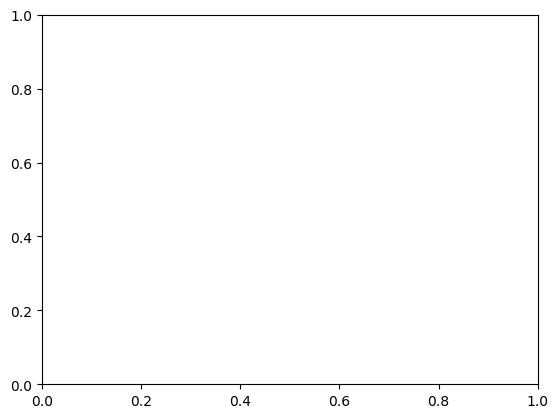

<class 'NameError'>: name 'df2' is not defined

In [50]:
import matplotlib.pyplot as plt

ax = plt.gca() # get an "Axes" object to draw on; gca stands for "get current Axes"
ax.scatter(df2["BirthDate"], df2["AccountOpened"]) # create a scatter plot based on these two dates
ax.set_ylabel("Account Opened") # label the y axis
ax.set_xlabel("Birth Date") # label the x axis

<b>Answer to 11. Use Matplotlib and/or Seaborn to analyse the ages at which customers open their account.  Is there a connection between the year they are born vs. the age at which they open the account?  Graph this in whatever way you think is best.</b>

My output is most likely incorrect due to the following |reasons:
1. Age for mean/median/mode is all 45. This must be inaccurate based on the questions within this material. I cannot identify at what point I ran code that caused this error. I initially observed the issue in problem #8.
2. I was unable to run df1/df2 in the example above since that had not been defined.

Ecample of error message when I ran df2 in the example above since that had not been defined.
NameError                                 Traceback (most recent call last)

Cell In[127], line 4

      1 import matplotlib.pyplot as plt
      
      3 ax = plt.gca() # get an "Axes" object to draw on; gca stands for "get current Axes"
---->
4 ax.scatter(df2["BirthDate"], df2["AccountOpened"]) # create a scatter plot based on these two dates

      5 ax.set_ylabel("Account Opened") # label the y axis
      
      6 ax.set_xlabel("Birth Date") # label the x axis

NameError: name 'df2' is not defined

Due to this error, I updated the df reference in the code below:

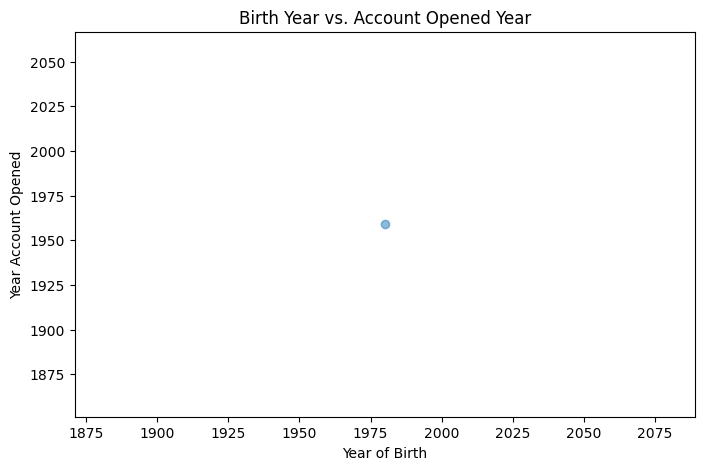

In [51]:
#scatter plot: Birth Year vs. Account Opening
plt.figure(figsize=(8,5))
plt.scatter(df_bank_loaded["BirthDate"].dt.year, df_bank_loaded["AccountOpened"].dt.year, alpha=0.5)
plt.xlabel("Year of Birth")
plt.ylabel("Year Account Opened")
plt.title("Birth Year vs. Account Opened Year")
plt.show()

In an effort to show the graph, I will fill in the missing birth dates with an estimate by replacing NaN BirthDates with January 1st of the most common year

In [52]:
##most common birth year
common_birth_year = int(df_bank_loaded["BirthDate"].dt.year.mode()[0]) 

#replace NaN BirthDates with January 1st of the most common year
df_bank_loaded["BirthDate"].fillna(pd.to_datetime(f"{common_birth_year}-01-01"), inplace=True)

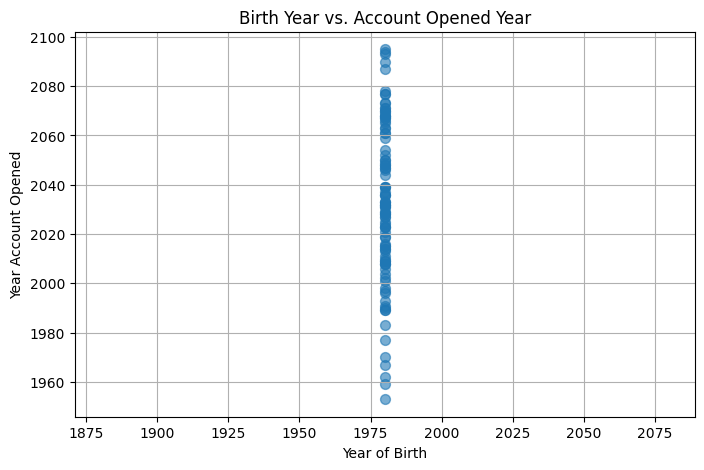

In [53]:
#graph with using estimated birthdates
plt.figure(figsize=(8,5))
plt.scatter(df_bank_loaded["BirthDate"].dt.year, df_bank_loaded["AccountOpened"].dt.year, alpha=0.6, s=50)
plt.xlabel("Year of Birth")
plt.ylabel("Year Account Opened")
plt.title("Birth Year vs. Account Opened Year")
plt.grid(True)  # Adds a grid for better readability
plt.show()


# 4. Storytelling With Data graph

Choose any graph in the Introduction of Storytelling With Data.  Using matplotlib to reproduce it in a rough way.  I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph.  However, if you're excited about learning to use matplotlib, this is a good way to do that.  You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

<b> Answer: I chose to use the bar grph on page 21 in the Introduction of Storytelling with data (reference: Figure 0.5 Example 2 (after): storytelling with data). </b>

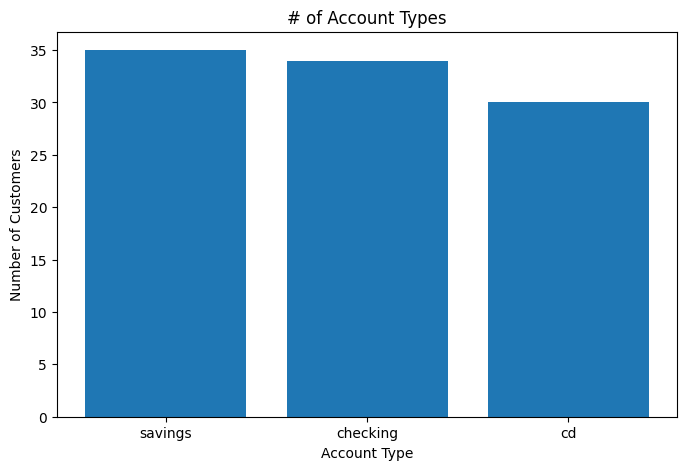

In [54]:
#count of account types
account_type_counts = df_bank_loaded["AccountType"].value_counts()

#create a bar chart
plt.figure(figsize=(8,5))
plt.bar(account_type_counts.index, account_type_counts.values)

#add labels and title and show
plt.xlabel("Account Type")
plt.ylabel("Number of Customers")
plt.title("# of Account Types")
plt.show()
